In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PARAMETERS import *

In [2]:
customers_df = pd.read_csv('customers_over_time.csv')
profits_df = pd.read_csv('profits_over_time.csv')
prices_df = pd.read_csv('prices_over_time.csv')

In [3]:
from PARAMETERS import steps

num_steps = steps

average_total_profits_EDLP = []
average_total_profits_Dynamic = []


for i in range(num_steps):  
    total_profit_EDLP = 0
    total_profit_Dynamic = 0
    
    for j in range(num_simulations):
        index = j * num_steps + i
        total_profit_EDLP += profits_df.iloc[index]['supermarket_EDLP_0']
        total_profit_Dynamic += profits_df.iloc[index]['supermarket_Dynamic_1']
    
    average_total_profits_EDLP.append(total_profit_EDLP / num_simulations)
    average_total_profits_Dynamic.append(total_profit_Dynamic / num_simulations)

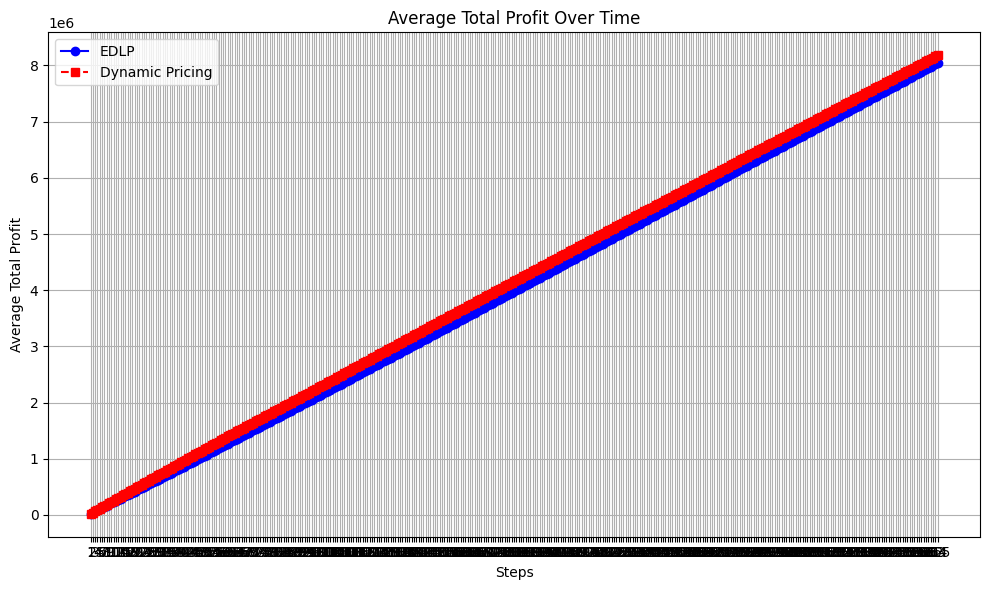

In [4]:
# plot the data
plt.figure(figsize=(10, 6))
steps = range(1, num_steps+1)  

plt.plot(steps, average_total_profits_EDLP, marker='o', linestyle='-', color='b', label='EDLP')
plt.plot(steps, average_total_profits_Dynamic, marker='s', linestyle='--', color='r', label='Dynamic Pricing')

plt.title('Average Total Profit Over Time')
plt.xlabel('Steps')
plt.ylabel('Average Total Profit')
plt.xticks(steps)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
profits_EDLP_last_step = []
profits_Dynamic_last_step = []

# Iterate through each simulation
for j in range(num_simulations):
    # Compute the index of the last step for the current simulation
    index = (j + 1) * num_steps - 1
    
    # Append the total profits at the last step to the respective lists
    profits_EDLP_last_step.append(profits_df.iloc[index]['supermarket_EDLP_0'])
    profits_Dynamic_last_step.append(profits_df.iloc[index]['supermarket_Dynamic_1'])

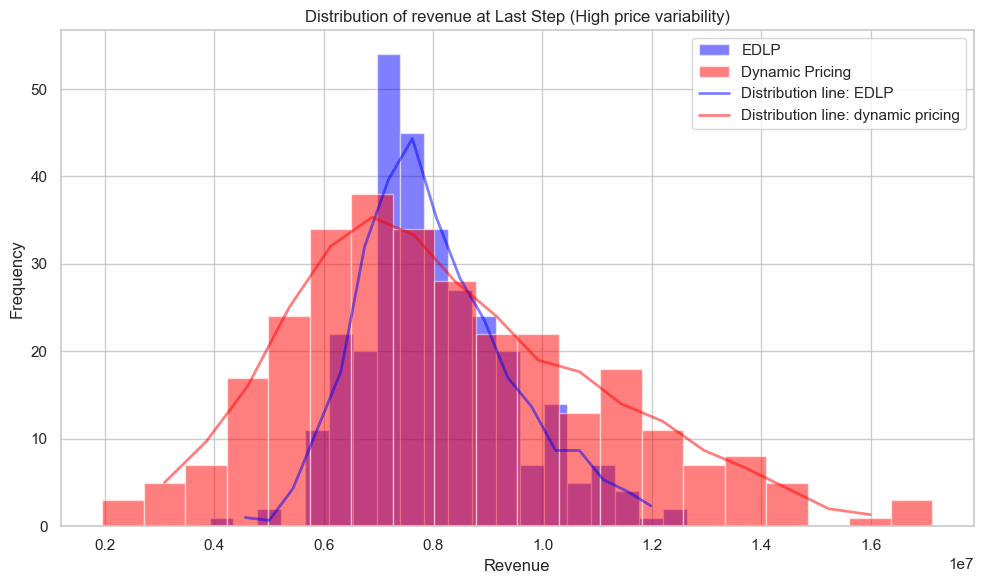

In [16]:
plt.figure(figsize=(10, 6))

# Plot histograms
counts_EDLP, bins_EDLP, _ = plt.hist(profits_EDLP_last_step, bins=20, alpha=0.5, color='blue', label='EDLP')
counts_Dynamic, bins_Dynamic, _ = plt.hist(profits_Dynamic_last_step, bins=20, alpha=0.5, color='red', label='Dynamic Pricing')

# Calculate bin centers
bin_centers_EDLP = (bins_EDLP[:-1] + bins_EDLP[1:]) / 2
bin_centers_Dynamic = (bins_Dynamic[:-1] + bins_Dynamic[1:]) / 2

# Apply rolling average to smooth the counts
rolling_window_size = 3  # You can adjust this for more/less smoothing
smooth_counts_EDLP = pd.Series(counts_EDLP).rolling(window=rolling_window_size, center=True).mean()
smooth_counts_Dynamic = pd.Series(counts_Dynamic).rolling(window=rolling_window_size, center=True).mean()

# Plot the smoothed lines
plt.plot(bin_centers_EDLP, smooth_counts_EDLP, color='blue', linestyle='-', linewidth=2, alpha = 0.5, label="Distribution line: EDLP")
plt.plot(bin_centers_Dynamic, smooth_counts_Dynamic, color='red', linestyle='-', linewidth=2, alpha = 0.5, label="Distribution line: dynamic pricing")

# Add titles and labels
plt.title('Distribution of revenue at Last Step (High price variability)')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
from scipy.stats import mannwhitneyu




# profits_EDLP_last_step = [profits_df.iloc[i * num_steps + last_step_index]['supermarket_EDLP_0'] for i in range(len(profits_df) // num_steps)]
# profits_Dynamic_last_step = [profits_df.iloc[i * num_steps + last_step_index + 1]['supermarket_Dynamic_1'] for i in range(len(profits_df) // num_steps)]

# print(len(profits_Dynamic_last_step))


statistic, p_value = mannwhitneyu(profits_EDLP_last_step, profits_Dynamic_last_step, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant difference between EDLP and Dynamic pricing strategies.")
else:
    print("There is no significant difference between EDLP and Dynamic pricing strategies.")


Mann-Whitney U statistic: 46576.0
P-value: 0.4580390541213839
There is no significant difference between EDLP and Dynamic pricing strategies.


In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [9]:
# Calculate average profits over time
average_profits = profits_df.mean(axis=1)  # Compute row-wise mean

# Add a column for simulation number
simulation_number = (profits_df.index // 50) + 1
profits_df['Simulation'] = simulation_number

# Group by simulation and calculate average profits for each type
average_profits_by_simulation = profits_df.groupby('Simulation').mean()

# Separate data for each type of supermarket
average_profits_EDLP = average_profits_by_simulation['supermarket_EDLP_0']
average_profits_Dynamic = average_profits_by_simulation['supermarket_Dynamic_1']

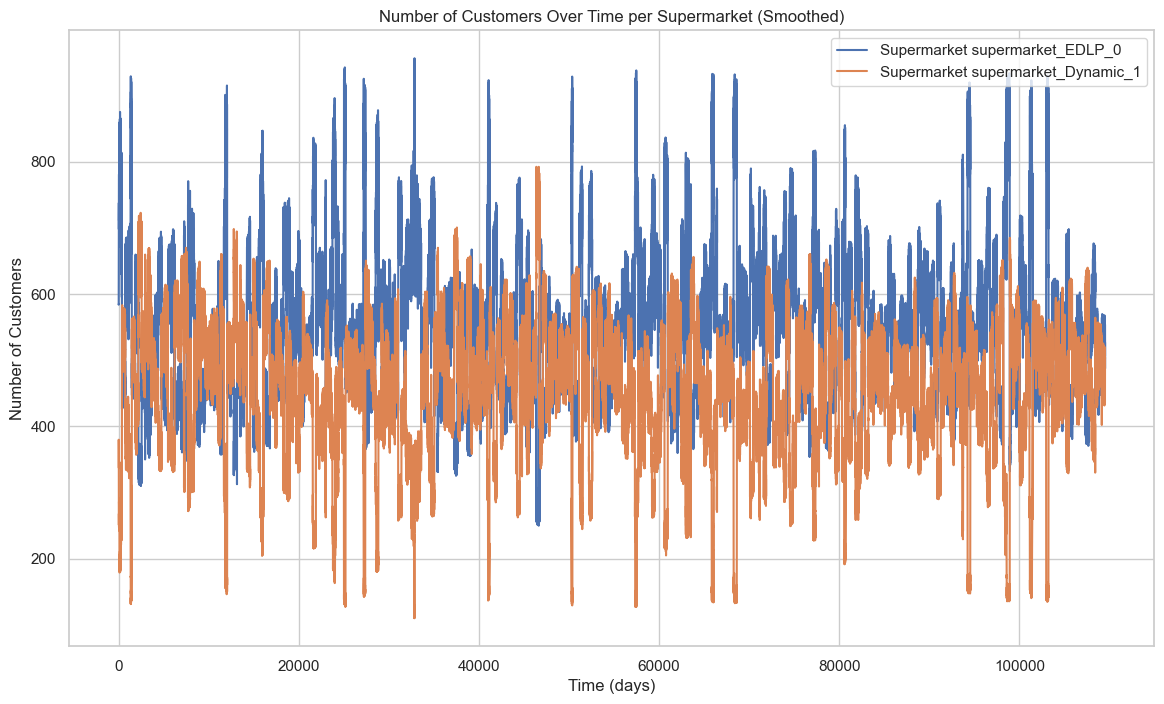

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply rolling average with a window size of 7 (one week)
smoothed_customers_df = customers_df.rolling(window=10).mean()

# Plot smoothed data
plt.figure(figsize=(14, 8))
for col in smoothed_customers_df.columns:
    sns.lineplot(data=smoothed_customers_df, x=smoothed_customers_df.index, y=col, label=f'Supermarket {col}')
plt.title('Number of Customers Over Time per Supermarket (Smoothed)')
plt.xlabel('Time (days)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


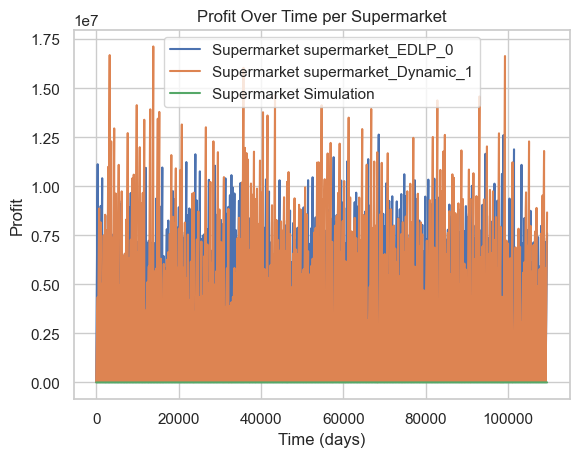

In [11]:
# Plot profit over time per store/strategy
for col in profits_df.columns:
    sns.lineplot(data=profits_df, x=profits_df.index, y=col, label=f'Supermarket {col}')
plt.title('Profit Over Time per Supermarket')
plt.xlabel('Time (days)')
plt.ylabel('Profit')
plt.legend()
plt.show()


In [12]:
# # Calculate mean, min, and max
# profits_mean = profits_df.mean(axis=1)
# profits_min = profits_df.min(axis=1)
# profits_max = profits_df.max(axis=1)

# # Set the plot style and figure size
# sns.set(style="whitegrid")
# plt.figure(figsize=(12, 8))

# # Plot the mean profit over time
# sns.lineplot(data=profits_mean, label='Mean Profit', color='blue')

# # Fill the area between min and max profit to show the range
# plt.fill_between(profits_df.index, profits_min, profits_max, alpha=0.3, label='Profit Range (Min-Max)', color='blue')

# # Plot profit over time per store/strategy
# for col in profits_df.columns:
#     sns.lineplot(data=profits_df[col], label=f'Supermarket {col}')

# # Set plot title and labels
# plt.title('Profit Over Time per Supermarket')
# plt.xlabel('Time (days)')
# plt.ylabel('Profit')
# plt.legend()
# plt.show()

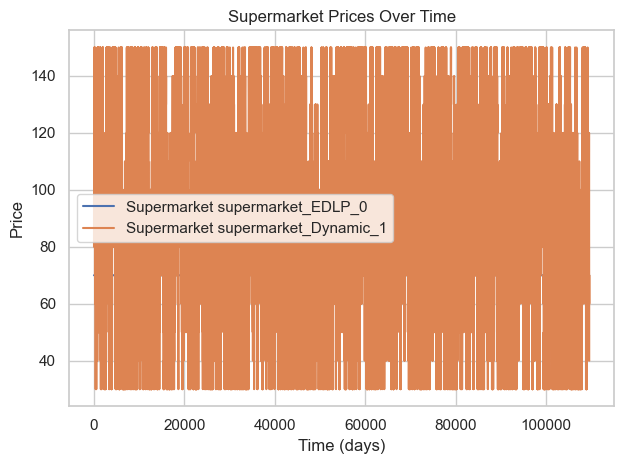

In [13]:

# Plot supermarket prices over time
for col in prices_df.columns:
    sns.lineplot(data=prices_df, x=prices_df.index, y=col, label=f'Supermarket {col}')
plt.title('Supermarket Prices Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Price')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

$P_{\text{aankoop}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot \text{huidige\_prijs} + \beta_2 \cdot \text{loyaliteit} - \beta_3 \cdot \text{budget})}}$


In [14]:
print(customers_df.mean())
print(prices_df.mean())

supermarket_EDLP_0       549.091023
supermarket_Dynamic_1    449.534511
dtype: float64
supermarket_EDLP_0       70.00000
supermarket_Dynamic_1    89.62347
dtype: float64
